# LESSON 6: K-MEANS CLUSTERING
<table><tr>
<td> <img src="../images/clustering_logo.png" width="500px"/> </td>
</tr></table>

*This lecture was refered by [machinelearningcoban.com](https://machinelearningcoban.com/2017/01/01/kmeans/)*

## 1. K-means clustering introduction

<img src="../images/kmeans_example.png" width="400px"/>

With the dataset contains lots of data points without label, we have to group these data points into K clusters and we expect that samples in the same cluster will have similar features. The algorithm to solve this problem is called ***K-MEANS CLUSTERING***.

<img src="../images/kmeans_example_5_clusters.png" width="400px"/>

In 2D space, we can see that the region of each cluster is a polygon with a line border. This line border is the mid perpendicular of a line connect 2 centers.

Assume that we have N data point $X = [x_1, x_2, \dots, x_N]$ and K < N is the number of clusters. We have to find $M = [m_1, m_2, \dots, m_K]$ which is the center (or representatives) of K clusters and $Y = [y_1, y_2, \dots, y_N]$ which is the label of N data points.

Label $y_i$ of a sample is encoded into one-hot type, which means $y_i = [y_{i1}, y_{i2}, \dots, y_{iK}]$ and $y_{ij} = 1$ if $x_i$ is predicted to belong to cluster $j$.

So, we have

<center>
\[
 y_{ik} \in \{0, 1\} \\
 \sum_{k = 1}^K y_{ik} = 1
\]
</center>

## 2. Loss function and Optimizer for K-means clustering
The main target of clustering technique is to minimize the distance between each data point and its center.

If data point $x_i$ belong to cluster $m_k$, so $y_{ik} = 1$ and $y_{ij} = 0$ with $\forall j \neq k$

<center>
    \[
    D(x_i, m_k) = (x_i - m_k)^2 \\
    D(x_i, m_k) = \sum_{j=1}^K y_{ij}(x_i - m_j)^2
    \]
</center>

We have the loss function for the whole dataset

<center>
    \[
    \mathcal{L}(Y, M) = MSE(Y, M)
    = \sum_{i=1}^{N}\sum_{j=1}^{K}y_{ij}(x_i - m_j)^2
    \]
</center>

With two variables $Y$ and $M$, to optimize the loss function, we fix one variable and optimize another and vice versa. Specifically, we solve two problems: Fixed $M$, optimize $Y$ and Fix $Y$, optimize $M$ respectively.

### Fixed M, optimize Y
For each data point $x_i$,

<center>
    \[
    y_i = arg \min_{y_i} \mathcal{L}(y_i) \\
    = arg \min_{y_i} \sum_{j=1}^{K}y_{ij}(x_i - m_j)^2
    \]
</center>

We need to find only one $y_i$ for each $x_i$ so this problem is solved by assign the label of each $x_i$ as the **nearest center** of it.

### Fixed Y, optimize M
For each existing cluster,

<center>
    \[
    m_j = arg \min_{m_j} \mathcal{L}(m_j) \\
    = arg \min_{m_j} \sum_{i=1}^{N}y_{ij}(x_i - m_j)^2
    \]
</center>

We need to find only one $m_j$ for each existing cluster

Calculate derivative of $\mathcal{L}(m_j)$ with $m_j$ and solve the derivative function

<center>
    \[
    \frac{\partial \mathcal{L}(m_j)}{\partial m_j} = 2 \sum_{i=1}^{N}y_{ij}(m_j - x_i) = 0 \\
    m_j \sum_{i=1}^{N}y_{ij} = \sum_{i=1}^{N}y_{ij}x_i \\
    m_j = \frac{\sum_{i=1}^{N}y_{ij}x_i}{\sum_{i=1}^{N}y_{ij}} \\
    m_j = \frac{\text{Sum of all data points in cluster} j}{\text{Number of data points in cluster} j}
    \]
</center>

That's why we call this algorithm ***k-means clustering***.

### Overall algorithm
***Input:*** Dataset contains N samples, K clusters. <br>
***Output:*** N label y for each data sample, K center m for each cluster.

***Step 1:*** Randomly choose K data points as initialized cluster center. <br>
***Step 2:*** Assign label for each data point by nearest center. <br>
***Step 3:*** If the results of ***Step 2*** is same as the previous iteration, stop the algorithm, else continue the next step. <br>
***Step 4:*** Calculate the new cluster center by the mean of data point in this cluster. <br>
***Step 5:*** Go back to ***Step 2***.



## 3. Weaknesses of K-means clustering
### We need to define number of clusters K
In some cases, we don't know the number of cluster and this is an obstacle while using K-means clustering

### Clustering results is highly depended on initialization
#### Slow convergence

<img src="../images/kmeans_slow_converge.gif" width="500px"/>

#### Bad results
<img src="../images/kmeans_bad_result.gif" width="500px"/>

We can overcome this problem by running K-means clustering multiple times and choose the best results. Or there are some upgraded versions of K-means clustering like K-means++.

### Clusters must be round in shape

<img src="../images/kmeans_diff_cov.gif" width="500px"/>


### K-means clustering doesn't work with non-convex dataset

<img src="../images/kmeans_smile_face.png" width="500px"/>

## 4. Implementation example

### 4.1. Prepare library and data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

np.random.seed(1511)

In [2]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
K = 3

In [3]:
X_0 = np.random.multivariate_normal(means[0], cov, N)
X_1 = np.random.multivariate_normal(means[1], cov, N)
X_2 = np.random.multivariate_normal(means[2], cov, N)

X_0.shape, X_1.shape, X_2.shape

((500, 2), (500, 2), (500, 2))

In [4]:
X = np.concatenate((X_0, X_1, X_2), axis=0)
X

array([[0.53696065, 1.81118293],
       [2.97971736, 0.54301342],
       [1.80053083, 1.55151062],
       ...,
       [2.76587169, 6.23655676],
       [3.32361827, 7.16138911],
       [1.30545257, 3.89287882]])

In [5]:
y = np.array([0]*N + [1]*N + [2]*N).T
y

array([0, 0, 0, ..., 2, 2, 2])

### 4.2. Implement from scratch

In [6]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', ms=4, alpha=.8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', ms=4, alpha=.8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', ms=4, alpha=.8)

    plt.axis('equal')
    plt.plot()
    plt.show()

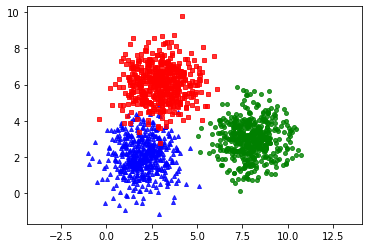

In [7]:
kmeans_display(X, y)

In [8]:
def kmeans_init_centers(X, k):
    # randomly pick k rows of X as initial centers
    return X[np.random.choice(X.shape[0], k, replace=False)]

In [9]:
def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)

In [10]:
def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster 
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

In [11]:
def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == 
        set([tuple(a) for a in new_centers]))

In [12]:
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0 
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

In [13]:
(centers, labels, it) = kmeans(X, K)
centers[-1]

array([[2.00111054, 2.07469757],
       [2.99782082, 6.08017804],
       [7.98183925, 2.99981394]])

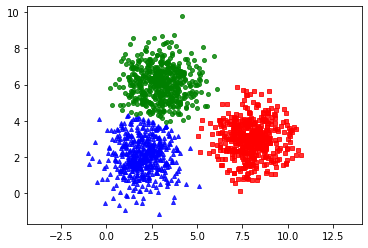

In [14]:
kmeans_display(X, labels[-1])

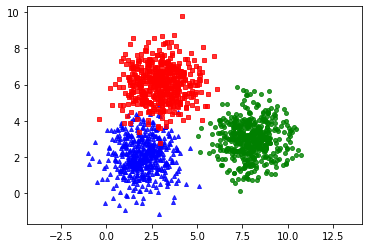

In [15]:
kmeans_display(X, y)

### 4.3. Use `sklearn`

In [16]:
from sklearn.cluster import KMeans

In [17]:
kmeans = KMeans(n_clusters=K, random_state=1511)
kmeans

KMeans(n_clusters=3, random_state=1511)

In [18]:
kmeans.fit(X)

KMeans(n_clusters=3, random_state=1511)

In [19]:
pred_labels = kmeans.predict(X)
pred_labels

array([0, 0, 0, ..., 2, 2, 0], dtype=int32)

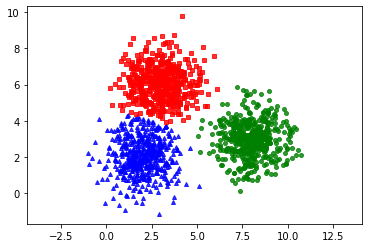

In [20]:
kmeans_display(X, pred_labels)

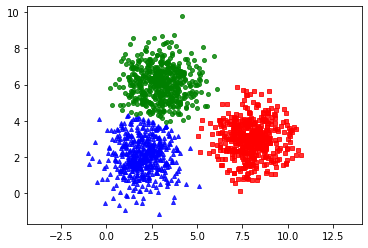

In [21]:
kmeans_display(X, labels[-1])

In [22]:
kmeans.cluster_centers_

array([[2.00111054, 2.07469757],
       [7.98183925, 2.99981394],
       [2.99782082, 6.08017804]])

In [23]:
centers[-1]

array([[2.00111054, 2.07469757],
       [2.99782082, 6.08017804],
       [7.98183925, 2.99981394]])

## 5. Homework